## 1. Importação de Bibliotecas

Importamos todas as bibliotecas necessárias para o treinamento e avaliação dos modelos:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

## 2. Carregamento dos Dados Processados

Carregamos os datasets que foram processados no notebook anterior:

In [3]:
print("--- Carregando os datasets preparados ---")
train_df = pd.read_csv('train_dataset.csv')
val_df = pd.read_csv('validation_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

# Combinar treino e validação para o GridSearchCV
full_train_df = pd.concat([train_df, val_df])
X_train = full_train_df.drop('target', axis=1)
y_train = full_train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Carregar o label encoder para obter os nomes das classes
label_encoder = joblib.load('label_encoder.joblib')
target_names = label_encoder.classes_

print(f"Dados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")
print(f"Classes: {target_names}")

# Dicionários para armazenar os melhores modelos e resultados
best_models = {}
results = {}

--- Carregando os datasets preparados ---
Dados de treino: (675, 27)
Dados de teste: (75, 27)
Classes: ['Fim de Jogo' 'Possibilidade de Fim' 'Tem Jogo']


## 3. Otimização de Hiperparâmetros

### 3.1 k-Nearest Neighbors (k-NN)

In [4]:
print("\n--- Otimizando k-NN ---")
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_models['k-NN'] = grid_knn.best_estimator_
print(f"Melhores parâmetros: {grid_knn.best_params_}")


--- Otimizando k-NN ---
Melhores parâmetros: {'n_neighbors': 7, 'weights': 'distance'}


### 3.2 Árvore de Decisão

In [5]:
print("\n--- Otimizando Árvore de Decisão ---")
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_models['Decision Tree'] = grid_dt.best_estimator_
print(f"Melhores parâmetros: {grid_dt.best_params_}")


--- Otimizando Árvore de Decisão ---
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


### 3.3 Multi-layer Perceptron (MLP)

In [6]:
print("\n--- Otimizando MLP ---")
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'max_iter': [1000]}
grid_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
best_models['MLP'] = grid_mlp.best_estimator_
print(f"Melhores parâmetros: {grid_mlp.best_params_}")


--- Otimizando MLP ---
Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}


### 3.4 Random Forest

In [7]:
print("\n--- Otimizando Random Forest ---")
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_leaf': [1, 2]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_rf.best_estimator_
print(f"Melhores parâmetros: {grid_rf.best_params_}")


--- Otimizando Random Forest ---
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


### 3.5 Support Vector Machine (SVM)

In [8]:
print("\n--- Otimizando SVM ---")
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly']}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_models['SVM'] = grid_svm.best_estimator_
print(f"Melhores parâmetros: {grid_svm.best_params_}")


--- Otimizando SVM ---
Melhores parâmetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## 4. Avaliação dos Modelos no Conjunto de Teste

Avaliamos todos os modelos otimizados no conjunto de teste:

In [9]:
print("\n\n--- Avaliação Final dos Modelos Otimizados no Conjunto de Teste ---")

for name, model in best_models.items():
    print(f"\n--- Relatório para: {name} ---")
    y_pred = model.predict(X_test)
    
    # Imprime o relatório de classificação completo
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Salva o F1-Score ponderado para a comparação final
    results[name] = f1_score(y_test, y_pred, average='weighted')



--- Avaliação Final dos Modelos Otimizados no Conjunto de Teste ---

--- Relatório para: k-NN ---
                      precision    recall  f1-score   support

         Fim de Jogo       0.89      0.96      0.92        25
Possibilidade de Fim       0.78      0.56      0.65        25
            Tem Jogo       0.73      0.88      0.80        25

            accuracy                           0.80        75
           macro avg       0.80      0.80      0.79        75
        weighted avg       0.80      0.80      0.79        75


--- Relatório para: Decision Tree ---
                      precision    recall  f1-score   support

         Fim de Jogo       0.70      0.76      0.73        25
Possibilidade de Fim       0.52      0.48      0.50        25
            Tem Jogo       0.68      0.68      0.68        25

            accuracy                           0.64        75
           macro avg       0.64      0.64      0.64        75
        weighted avg       0.64      0.64      0.6

## 5. Comparação e Visualização dos Resultados

Criamos uma tabela comparativa e visualizamos o desempenho dos modelos:



--- Tabela Comparativa de Desempenho ---
          Modelo  F1-Score (Ponderado)
0            MLP              0.865196
1            SVM              0.863903
2           k-NN              0.791413
3  Random Forest              0.771005
4  Decision Tree              0.636923


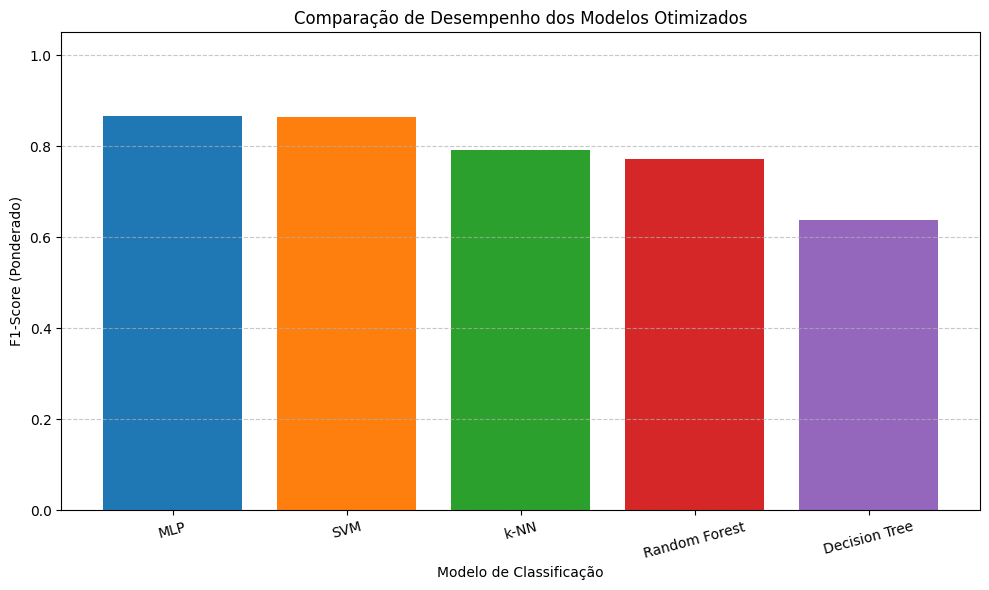

In [10]:
# Criar tabela comparativa dos resultados
results_df = pd.DataFrame(list(results.items()), columns=['Modelo', 'F1-Score (Ponderado)'])
results_df = results_df.sort_values(by='F1-Score (Ponderado)', ascending=False).reset_index(drop=True)

print("\n\n--- Tabela Comparativa de Desempenho ---")
print(results_df)

# Criar gráfico de barras para visualização
plt.figure(figsize=(10, 6))
plt.bar(results_df['Modelo'], results_df['F1-Score (Ponderado)'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Modelo de Classificação')
plt.ylabel('F1-Score (Ponderado)')
plt.title('Comparação de Desempenho dos Modelos Otimizados')
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('comparacao_modelos.png')
plt.show()

## 6. Seleção e Salvamento do Melhor Modelo

Selecionamos o modelo com melhor desempenho e o salvamos para uso futuro:

In [11]:
# Selecionar o melhor modelo baseado no F1-Score
best_model_name = results_df.loc[0, 'Modelo']
best_model_object = best_models[best_model_name]

print(f"\n🏆 Com base no F1-Score, o melhor modelo para este problema é o: {best_model_name}")
print(f"F1-Score do melhor modelo: {results_df.loc[0, 'F1-Score (Ponderado)']:.4f}")

# Salvar o melhor modelo
print("Salvando o modelo em 'best_classifier.joblib'...")
joblib.dump(best_model_object, 'best_classifier.joblib')
print("Modelo salvo com sucesso! Pronto para ser usado no jogo.")


🏆 Com base no F1-Score, o melhor modelo para este problema é o: MLP
F1-Score do melhor modelo: 0.8652
Salvando o modelo em 'best_classifier.joblib'...
Modelo salvo com sucesso! Pronto para ser usado no jogo.
